
		 Convex Hull Algorithms 


Points: [(67, 23), (37, 4), (9, 82), (12, 73), (17, 25), (16, 34), (71, 98), (96, 17), (32, 72), (-9, 59), (86, -5), (70, 17), (26, 70), (64, 40), (68, 3), (41, 85), (78, 47), (92, 76), (38, 82), (50, 74), (-1, 78), (57, 23), (0, 37), (1, 78), (59, 96), (-2, 86), (-1, 59), (13, 75), (-5, 18), (65, 65), (70, 22), (7, 15), (97, 33), (22, 60), (91, -2), (61, 32), (18, 46), (51, 75), (78, 0), (-9, 27), (22, 12), (25, 10), (27, 57), (93, 39), (-5, -5), (36, -8), (49, 75), (31, 44), (-3, 29), (13, 41), (94, -10), (99, 70), (12, 76), (91, 32), (83, 17), (6, 9), (-1, 82), (54, 79), (18, 21), (-6, 10), (23, 83), (58, 26), (4, 64), (84, 92), (64, 84), (70, 75), (-8, 85), (6, -7), (3, 8), (1, 60), (18, 89), (90, 7), (23, 8), (87, 79), (97, 64), (76, 82), (60, 22), (18, 13), (49, 74), (83, 45)]
Length of point list: 80
Graham's Scan Convex Hull:  [(-9, 27), (-9, 59), (-8, 85), (-2, 86), (71, 98), (84, 92), (99, 70), (97, 33), (96, 17), (94, -10), (6, -7), (-5, -5), (-

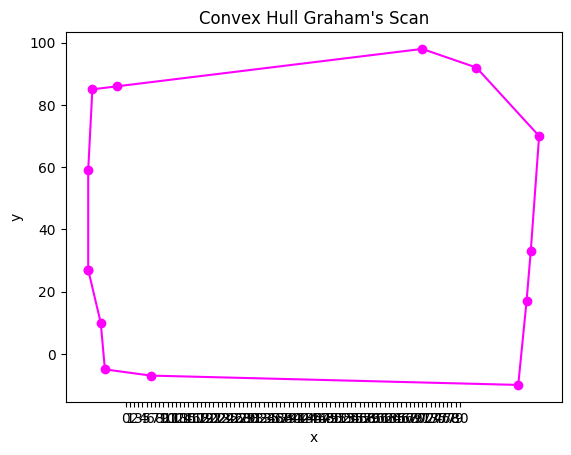

Convex Hull:  [(-9, 59), (-8, 85), (-2, 86), (71, 98), (84, 92), (99, 70), (97, 33), (96, 17), (94, -10), (6, -7), (-5, -5), (-9, 27), (-9, 59)]
Vertices: 13


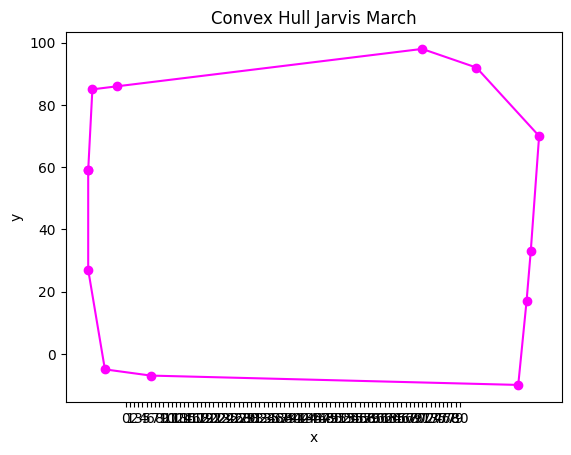

[(-9, 59), (-8, 85), (-9, 27), (-2, 86), (71, 98), (84, 92), (99, 70), (6, -7), (-5, -5), (94, -10), (96, 17), (97, 33)]
Vertices: 24


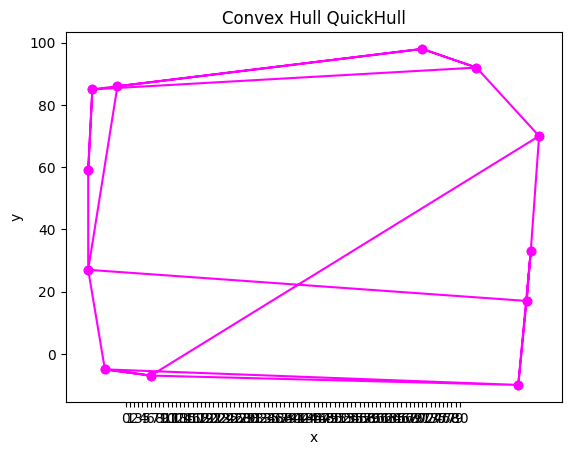



Visualizing STEPS of Convex Hull calculation algorithm JARVIS MARCH





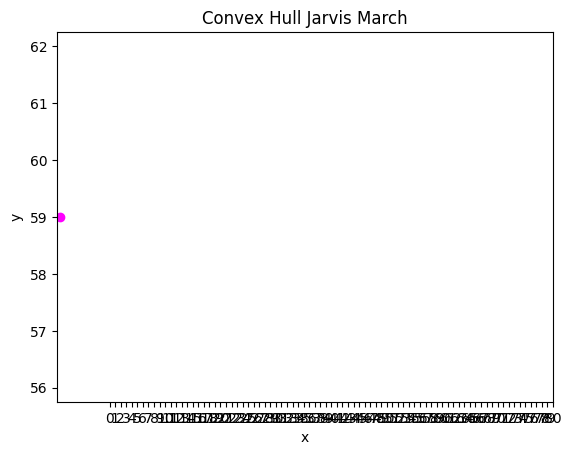

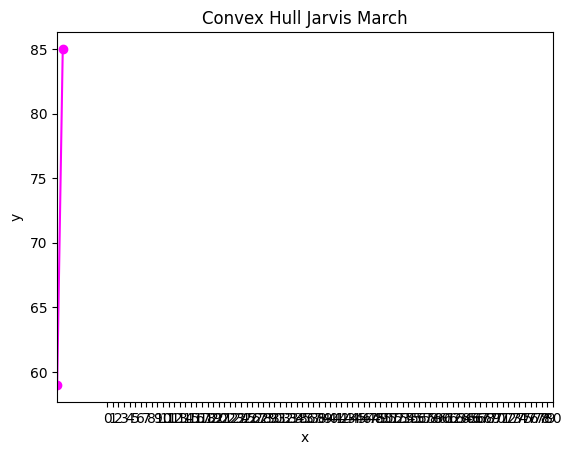

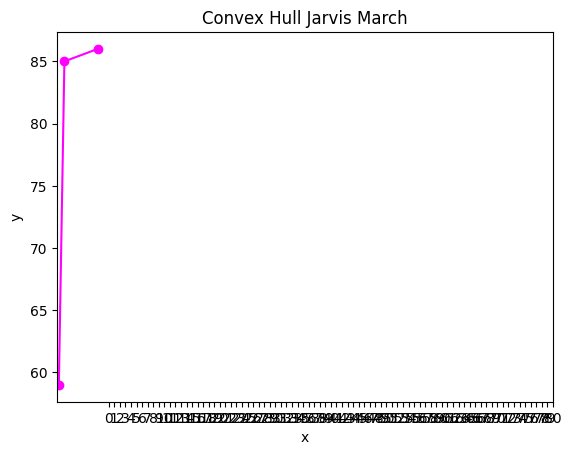

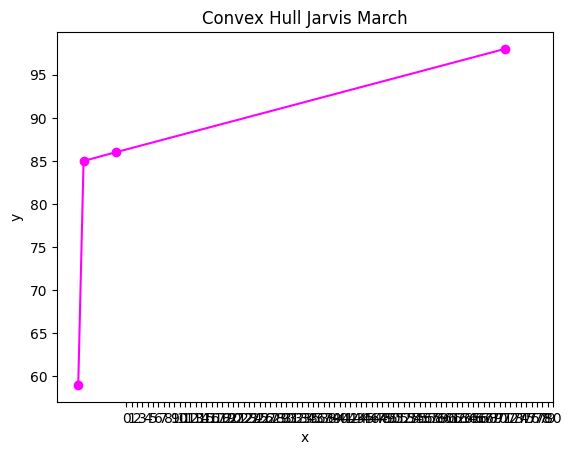

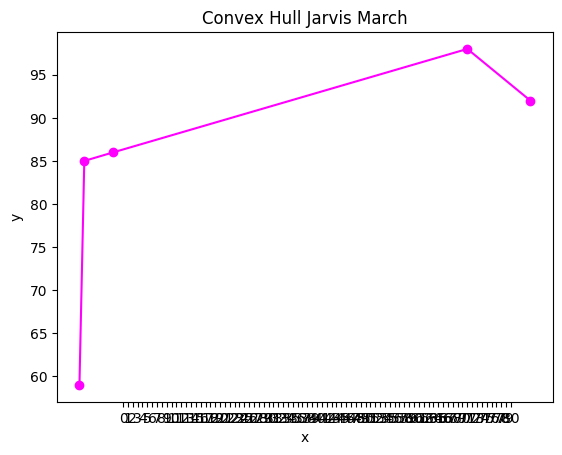

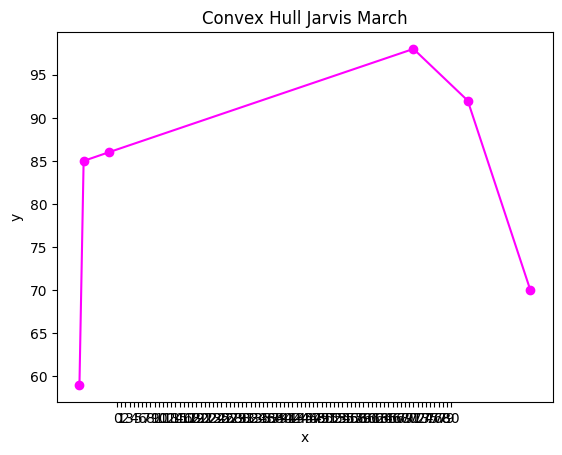

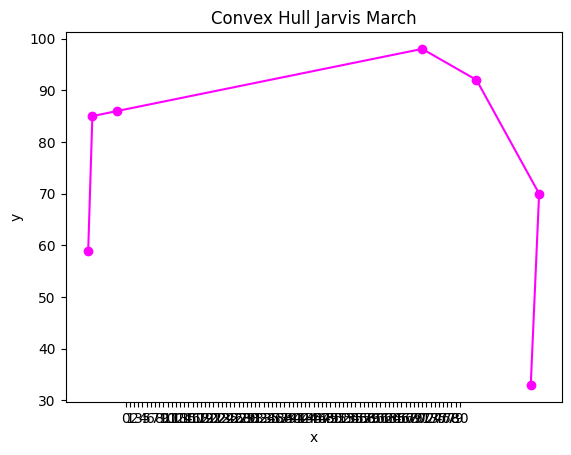

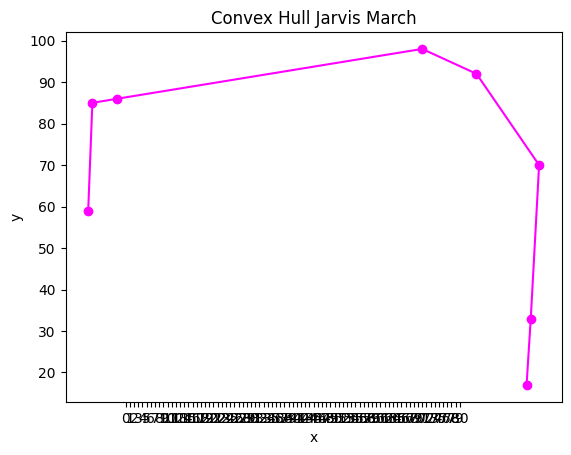

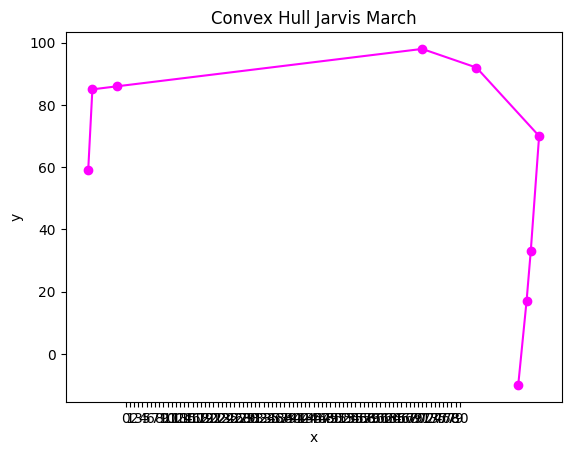

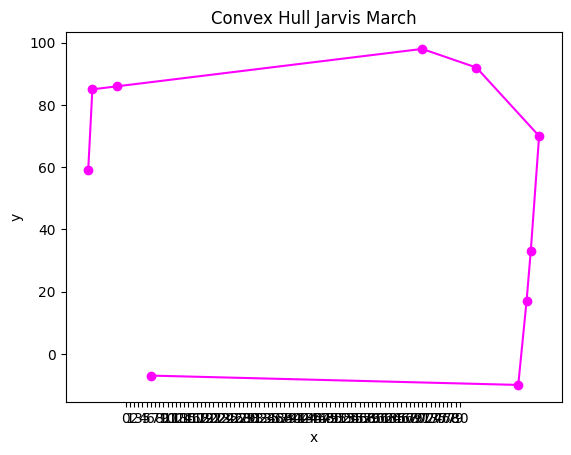

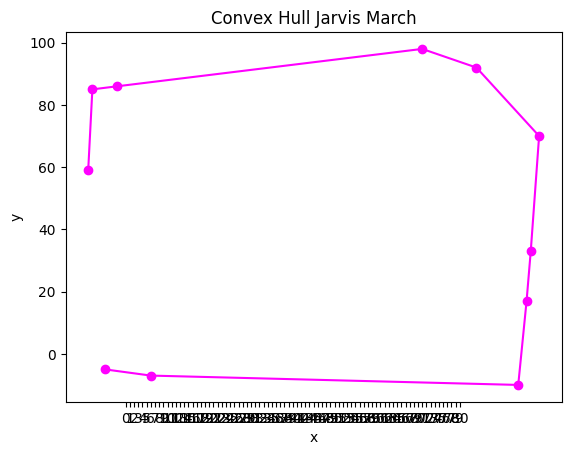

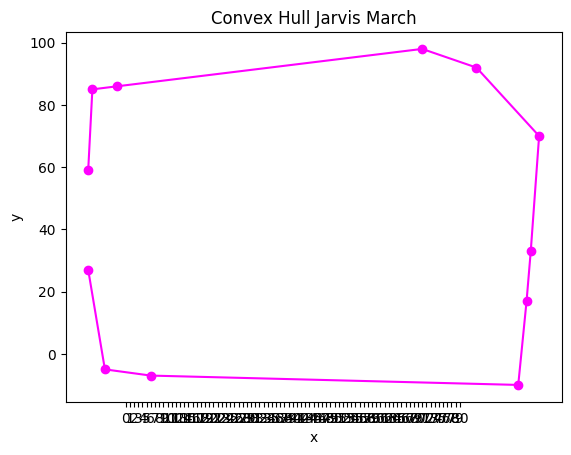

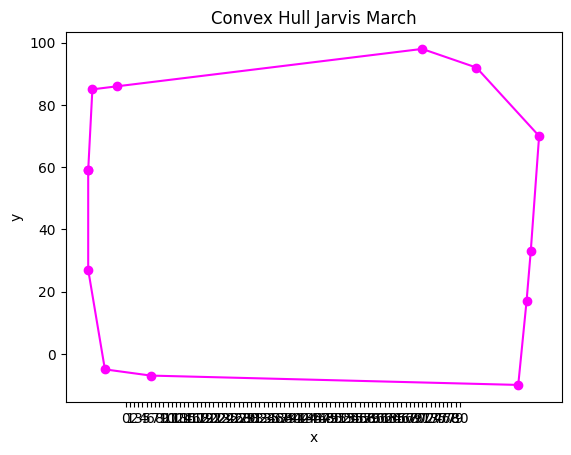

Convex Hull:  [(-9, 59), (-8, 85), (-2, 86), (71, 98), (84, 92), (99, 70), (97, 33), (96, 17), (94, -10), (6, -7), (-5, -5), (-9, 27), (-9, 59)]
Vertices:  13

	 Convex Hull in R3



Point list in R3: [(8, 92, 21), (85, 89, -6), (25, 25, 21), (10, 77, 76), (94, 13, 77), (11, 39, 75), (90, 85, 96), (-2, 98, 36), (47, 79, -7), (22, 37, -3), (0, 19, 82), (76, 14, 22), (-6, 79, -3), (45, 51, 45), (88, 16, 27), (11, 100, 18), (86, 89, 24), (-8, 11, 53), (100, 7, 67), (42, 38, 11), (60, 60, 1), (44, 24, 64), (96, 75, 69), (47, 70, -5), (55, 41, 30), (98, 21, 46), (52, 62, 70), (2, 86, 80), (65, 67, 29), (18, 43, 95), (94, 25, 46), (57, 36, 49), (77, 49, 42), (3, 46, 44), (-5, 27, 81), (30, 47, 71), (40, 95, 73), (2, 27, 100), (14, 77, 19), (7, 60, 9), (90, 70, -5), (41, 2, 85), (4, 17, 0), (33, -2, 90), (28, 28, -6), (2, 66, 60), (61, 20, 7), (21, 95, 63), (-7, 41, 64), (55, 92, -9)]
Vertices: 50
Graham's Scan Convex Hull R3:  [(-8, 11, 53), (0, 19, 82), (2, 27, 100), (2, 66, 60), (2, 86, 80

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


# NOTES: 
# 1. The following program calculates convex hull of a randomly generated set (list) of elements of R^2 (and R^3).
# Every algorithm is defined as a function for organization purposes. 

# 2. According to the algorithm the user desires, the program calculates and prints the convex hull's vertices as its
# output. After every convex hull computation, we allow the user to re-enter an algorithm name of his choosing, if he 
# wants to test the correctness of each output. 

# 3. Terminate the program by either typing in "No" when asked if you want to continue, or by simply hitting ctrl + C.


# Functions
        
# Defining orientation predicate function in R2
# Note: pi[0] = xi, pi[1] = yi, where i = 0,1,2
def orientation2(p0 = [0,0], p1 = [0,0], p2 = [0,0]):
    return (p1[0] - p0[0]) * (p2[1] - p0[1]) - (p2[0] - p0[0]) * (p1[1] - p0[1])
    

# Defining orientation predicate function in R3 using numpy library
def orientation3(p0=[0,0,0],p1=[0,0,0],p2=[0,0,0],p3=[0,0,0]):
    a = np.array([[1,p0[0],p0[1],p0[2]], [1,p1[0],p1[1],p1[2]], [1,p2[0],p2[1],p2[2]], [1,p3[0],p3[1],p3[2]]])
    return np.linalg.det(a)


# Defining function that calculates squared distance between two elements of R2
# Note: pi[0] = xi, pi[1] = yi, where i = 0,1
def SqDist(p0=[0,0],p1=[0,0]):
    return (p0[0] - p1[0]) * (p0[0] - p1[0]) + (p0[1] - p1[1]) * (p0[1] - p1[1])



# Defining function that compares two elements of R2 using the orientation predicate 
# Note: it covers collinear case 
def cmp(p0=[0,0],p1=[0,0],p2=[0,0]):
    det = orientation2(p0,p1,p2)
    if det == 0:        # Collinear case
        if SqDist(p0,p2) >= SqDist(p0,p1):
            return -1
        else:
            return 1
    elif det < 0:
        return -1
    else: 
        return 1
    
    
# Defining a function that calculates which side of line (ab) p belongs in 
# Note: It's almost like calculating the orientation predicate determinant,
# but we also return a value based on turn of a,b,p
# Convention: result > 0 means that p is on the left of (ab), so ccw
#             result < 0 means that p is on the right of (ab), so cw
#             result == 0 means that p is a point of (ab), so collinear
def findSide(a=[0,0],b=[0,0],p=[0,0]):
    a = np.array([[1,a[0],a[1]], [1,b[0],b[1]], [1,p[0],p[1]]])
    result = np.linalg.det(a)
    
    if result > 0:
        return 1
    elif result < 0:
        return -1
    else:
        return 0
    

# Defining a function that calculates distance of element p from line (ab)
def distLine(a=[0,0],b=[0,0],p=[0,0]):
    return abs((p[1] - a[1]) * (b[0] - a[0]) - (b[1] - a[1]) * (p[0] - a[0]))



     

# Implementation 
print("\n\t\t Convex Hull Algorithms \n\n")

    
    
    
    
# 1. Graham's Scan Algorithm (R2) 

def GrahamsScan2(P = []):

    n = len(P)      # Defining n = |P|
    LUpper = []     
    LLower = []
    
    # Organize elements in lexicographic order (sort() method by default does that in python)
    P.sort()        
        
    # Creating LUpper
    LUpper.append(P[0])     # Insert first and second element in LUpper 
    LUpper.append(P[1])     
    
    for i in range(2,n):
        LUpper.append(P[i])
        while len(LUpper) > 2 and orientation2(LUpper[-3],LUpper[-2],LUpper[-1]) >= 0:
            LUpper.pop(-2)               # Add elif det == 0

            
    # Creating LLower
    LLower.append(P[n-1])       # Reminder: n is 1-based, so last two elements are P[n-2] and P[n-1]
    LLower.append(P[n-2])
    for i in range(n-3,1,-1):
        LLower.append(P[i])
        while len(LLower) > 2 and orientation2(LLower[-3],LLower[-2],LLower[-1]) >= 0:
            LLower.pop(-2)               # Add elif det == 0            
    
                            
    LLower.remove(LLower[0])    # Remove first and last elements of LLower
    LLower.remove(LLower[len(LLower) - 1])
    
    # Creating list of convex hull vertices L
    L = list(dict.fromkeys(LUpper + LLower))
    
    # Lastly, add the first convex hull vertex at the end of the list 
    L.append(L[0])
    return L
        
    
 
 
 
# 1b. Graham's Scan Algorithm in R2 with step-by-step visualization  

def GrahamsScan2Step(P = []):

    n = len(P)      
    LUpper = []     
    LLower = []
    
    # Organize elements in lexicographic order (sort() method by default does that in python)
    P.sort()        
        
    # Creating LUpper and inserting first and second element in it
    LUpper.append(P[0])      
    
    currentLength = len(LUpper)
    x = [LUpper[i][0] for i in range(currentLength)]
    y = [LUpper[i][1] for i in range(currentLength)]
        
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Graham's Scan")
    plt.show() 

    LUpper.append(P[1])     
    
    currentLength = len(LUpper)
    x = [LUpper[i][0] for i in range(currentLength)]
    y = [LUpper[i][1] for i in range(currentLength)]
        
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Graham's Scan")
    plt.show()    
    for i in range(2,n):
        LUpper.append(P[i])
        while len(LUpper) > 2 and orientation2(LUpper[-3],LUpper[-2],LUpper[-1]) >= 0:
            LUpper.pop(-2)               
            
        currentLength = len(LUpper)
        x = [LUpper[i][0] for i in range(currentLength)]
        y = [LUpper[i][1] for i in range(currentLength)]
            
        plt.plot(x,y,color = 'magenta', marker = 'o')
        plt.xticks(range(0, n + 1, 1))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("Convex Hull Graham's Scan")
        plt.show()

            
    # Creating LLower
    LLower.append(P[n-1])       # Reminder: n is 1-based, so last two elements are P[n-2] and P[n-1]
    
    currentLength = len(LLower)
    x = [LLower[i][0] for i in range(currentLength)]
    y = [LLower[i][1] for i in range(currentLength)]
        
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Graham's Scan")
    plt.show()    
    
    LLower.append(P[n-2])
    currentLength = len(LLower)
    x = [LLower[i][0] for i in range(currentLength)]
    y = [LLower[i][1] for i in range(currentLength)]
        
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Graham's Scan")
    plt.show() 
    for i in range(n-3,1,-1):
        LLower.append(P[i])
        while len(LLower) > 2 and orientation2(LLower[-3],LLower[-2],LLower[-1]) >= 0:
            LLower.pop(-2)                         
            currentLength = len(LLower)
        x = [LLower[i][0] for i in range(currentLength)]
        y = [LLower[i][1] for i in range(currentLength)]

        plt.plot(x,y,color = 'magenta', marker = 'o')
        plt.xticks(range(0, n + 1, 1))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("Convex Hull Graham's Scan")
        plt.show() 
                            
    LLower.remove(LLower[0])    # Remove first and last elements of LLower
    LLower.remove(LLower[len(LLower) - 1])
    
    # Creating list of convex hull vertices L
    L = LUpper + LLower
    
    # Lastly, add the first convex hull vertex at the end of the list 
    L.append(L[0])
    currentLength = len(L)
    x = [L[i][0] for i in range(currentLength)]
    y = [L[i][1] for i in range(currentLength)]
        
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Graham's Scan")
    plt.show() 
    
    return L
          
    





# 1c. Graham's Scan Algorithm in R3 
def GrahamsScan3(P = []):

    n = len(P)      
    LUpper = []     
    LLower = []
    
    # Organize elements in lexicographic order 
    P.sort()        
        
    # Creating LUpper and inserting first and second element in it 
    LUpper.append(P[0])     
    LUpper.append(P[1])     
    
    for i in range(2,n):
        LUpper.append(P[i])
        
        # Calculating turn with orientation predicate in R3
        while len(LUpper) > 2 and orientation3(LUpper[-3],LUpper[-2],LUpper[-1]) >= 0:
            LUpper.pop(-2)               

            
    # Creating LLower
    LLower.append(P[n-1])       
    LLower.append(P[n-2])
    for i in range(n-3,1,-1):
        LLower.append(P[i])
        
        # Calculating turn with orientation predicate in R3
        while len(LLower) > 2 and orientation3(LLower[-3],LLower[-2],LLower[-1]) >= 0:
            LLower.pop(-2)                         
    
    
    # Remove first and last elements of LLower                            
    LLower.remove(LLower[0])    
    LLower.remove(LLower[len(LLower) - 1])
    
    # Creating list of convex hull vertices L
    L = list(dict.fromkeys(LUpper + LLower))
    
    # Lastly, add the first convex hull vertex at the end of the list 
    L.append(L[0])
    return L
        
    
 
 

    
# 2a. Gift-wrapping (Jarvis March) Algorithm (R2)

def JarvisMarch(P = []):
    
    n = len(P)
    
    # Finding leftmost point P[r0] (r0 is index)
    r0 = 0        
    for i in range(1,n):
        if P[i][0] < P[r0][0]:
            r0 = i
        elif P[i][0] == P[r0][0]:
            if P[i][1] > P[r0][1]: 
                r0 = i
    
    # Defining its position as an extra variable           
    pos = P.index(P[r0])
    
    # Initializing list of convex hull vertices and elements p and q
    L = []            
    p = pos
    q = 0
    while(1):
        L.append(P[p])
        
        # Calculating q as the next, sequentially, element of P  
        q = (p + 1) % n
        
        # Iterating over every element of P except for r0, which is the leftmost point
        for i in range(n):       
            det = orientation2(P[p],P[i],P[q])
            
            # Calculating turn of r0,i,q, if they are collinear then choose the farthest element
            if det < 0 or (det == 0 and SqDist(P[i],P[p]) > SqDist(P[q],P[p])):
                q = i
        p = q
        if p == pos:
            break
    
    # Lastly, add the first convex hull vertex at the end of the list     
    L.append(L[0])  
    return L
   
   
   
   
   
   
# 2b. Gift-wrapping (Jarvis March) Algorithm in R2 with STEP-BY-STEP visualization

def JarvisMarchStep(P=[]):
    
    n = len(P)
    
    # Finding leftmost point P[r0] (r0 is index)
    r0 = 0        
    for i in range(1,n):
        if P[i][0] < P[r0][0]:
            r0 = i
        elif P[i][0] == P[r0][0]:
            if P[i][1] > P[r0][1]: 
                r0 = i
    
    # Defining its position as an extra variable           
    pos = P.index(P[r0])
    
    # Initializing list of convex hull vertices and elements p and q
    L = []            
    p = pos
    q = 0
    while(1):
        L.append(P[p])
        
        # Calculating q as the next, sequentially, element of P  
        q = (p + 1) % n
        
        # Iterating over every element of P except for r0, which is the leftmost point
        for i in range(n):       
            det = orientation2(P[p],P[i],P[q])
            
            # Calculating turn of r0,i,q, if they are collinear then choose the farthest element
            if det < 0 or (det == 0 and SqDist(P[i],P[p]) > SqDist(P[q],P[p])):
                q = i
        p = q
        
        # Plotting convex hull as it stands in current iteration
        currentLength = len(L)
        x = [L[i][0] for i in range(currentLength)]
        y = [L[i][1] for i in range(currentLength)]
            
        plt.plot(x,y,color = 'magenta', marker = 'o')
        plt.xticks(range(0, n + 1, 1))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("Convex Hull Jarvis March")
        plt.show()     
        
        if p == pos:
            break
    
    # Lastly, add the first convex hull vertex at the end of the list 
    # So, we need to print the final step of the algorithm    
    L.append(L[0]) 
    
    currentLength = len(L)
    x = [L[i][0] for i in range(currentLength)]
    y = [L[i][1] for i in range(currentLength)]
        
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Jarvis March")
    plt.show() 
 
    return L
          
   
   
    
    
     
# 3. Divide and Conquer Convex Hull algorithm in R2
def divideAndConquer(P=[]):
    
    n = len(P)
    
    # Sorting elements of P in lexicographic order
    P.sort()
    
    # Defining convex hull as a list
    L = []
    
    # Finding leftmost and rightmost points a and b 
    # and add them to the hull
    a = P[0]
    b = P[n-1]
    L.append(a)
    L.append(b)
    
    
    # Finding set of points to the left and right side 
    # of line (ab)
    
    # Convention: In case of collinearity, apply infinitesimal 
    # displacement method as follows: There's a 50% chance that 
    # elements y-coordinate will shift upward by 0.2 and 50% 
    # chance that it will shift downward by 0.2. Thus, the former
    # element belongs in leftSet and latter in rightSet
    leftSet = set()
    rightSet = set()
    displacementConstant = 0.2
    for i in range(1,n-1):
        turn = orientation2(a,b,P[i])
        
        if turn > 0:        # Counter-clockwise, so left side
            leftSet.add(P[i])
        elif turn < 0:      # Clockwise, so right side
            rightSet.add(P[i])
        else:               # Collinear, must apply convenvtion
            if random.randint(0,1) == 0:
                P[i][1] = P[i][1] + displacementConstant
                leftSet.add(P[i])
            else:
                P[i][1] = P[i][1] - displacementConstant
                rightSet.add(P[i])

    
    
      
    
    
# 4. Recursive QuickHull Algorithm in R2

# Here, we define Hull as a global list since 
# our algorithm is recursive and we don't want
# it to reset on every call
quickHullL = []

# Note: p1 is the start and p2 the end of line (p1p2) <line>.
# Also, <side> is an indication of the position of element P[i]
# in relation to line (p1p2)
def QuickHull(P=[], p1=[0,0], p2=[0,0], side = 0):
   
    n = len(P)
    index = -1
    maxDistance = 0
    
    # Searching for point of P with max distance from line (p1p2)
    # (also calculating its turn)
    for i in range(n): 
        dist = distLine(p1,p2,P[i])
        if dist > maxDistance and findSide(p1,p2,P[i]) == side:
            index = i
            maxDistance = dist
    
    # If no such point was found, add points p1 and p2 to hull
    if index == -1:
        quickHullL.append(p1)
        quickHullL.append(p2)
        return
    
    # Repeat algorithm for parts of convex hull separated by P[index]
    QuickHull(P, P[index], p1, -findSide(P[index], p1, p2))
    QuickHull(P, P[index], p2, -findSide(P[index], p2, p1))
    
    
# Defining function that prints vertices of convex hull calculated 
# by the QuickHull algorithm
def printHull(P=[]):
    
    n = len(P)
    
    # Finding points with min and max x coordinate
    xMin = 0
    xMax = 0
    for i in range(1,n):
        if P[i][0] < P[xMin][0]:
            xMin = i
        if P[i][0] > P[xMax][0]:
            xMax = i
            
    # Recursively calculate convex hull on both sides
    # of line (P[xMin][0]P[xMax][0])
    QuickHull(P,P[xMin], P[xMax], 1)
    QuickHull(P,P[xMin], P[xMax], -1) 
    
    # Printing elements of convex hull
    L = list(dict.fromkeys(quickHullL))
    print(L)
        



        
  
# Main function 
def main():
    maxElements = 80
    
    if maxElements < 3:
        print("Convex Hull is not possible! Enter a valid number of elements.")
        return
    
    points = [(random.randint(-10,100),random.randint(-10,100)) for i in range(maxElements)]     # Creating <maxElements> random points of R2   
    print("Points:", points)
    print("Length of point list:" , len(points))
            
            
            
    # Graham's Scan R2
    L = GrahamsScan2(points)
    n = len(L)
    print("Graham's Scan Convex Hull: ", L)
    print("Vertices:", n)
            
    x = [L[i][0] for i in range(n)]
    y = [L[i][1] for i in range(n)]
    
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, maxElements + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Graham's Scan")
    plt.show()
            
            
            
    # Jarvis March
    L = JarvisMarch(points)
    n = len(L)
    print("Jarvis March Convex Hull: ", L)
    print("Vertices:", n)
                        
    x = [L[i][0] for i in range(n)]
    y = [L[i][1] for i in range(n)]
            
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, maxElements + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Jarvis March")
    plt.show()
            

    # QuickHull 
    printHull(points)
    L = quickHullL
    n = len(quickHullL)
    print("Vertices:", n)
            
    x = [L[i][0] for i in range(n)]
    y = [L[i][1] for i in range(n)]
    
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, maxElements + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull QuickHull")
    plt.show()


    # l = [(9,8),(71,2),(9,8), (65,1), (64,3),(5,6)]
    # l.sort()
    # print(l)
    
    # newList = list(dict.fromkeys(l))
    # print(newList)
    
    
    # Jarvis March step-by-step visual implementation
    print("\n\nVisualizing STEPS of Convex Hull calculation algorithm JARVIS MARCH\n\n\n")
    
    L = JarvisMarchStep(points)
    print("Jarvis March Convex Hull: ", L)
    print("Vertices: ", len(L))
    
    # L = GrahamsScan2Step(points)
    # print("Convex Hull: ", L)
    # print("Vertices: ", len(L))    
    
    # newList = [(3,5,6), (4,2,76), (-1,9,7), (3,4,8), (3,5,5)]
    # newList.sort()
    # print(newList)
    
    
    print("\n\t Convex Hull in R3\n\n\n")
    
    
    maxElementsR3 = 50
    pointsR3 = [(random.randint(-10,100),random.randint(-10,100),random.randint(-10,100)) for i in range(maxElementsR3)] 
    
    print("Point list in R3:", pointsR3)
    print("Vertices:", len(pointsR3))
    
    
    # Graham's Scan R3
    L = GrahamsScan3(pointsR3)
    n = len(L)
    print("Graham's Scan Convex Hull R3: ", L)
    print("Vertices: ", n)
    
    # x = [L[i][0] for i in range(n)]
    # y = [L[i][1] for i in range(n)]    
    # z = [L[i][2] for i in range(n)]
   
    # # Creating a 3d figure 
    # fig = plt.figure()
    # ax = plt.axes(projection = '3d')
    
    # # for i in range(n):
    # #     plt.plot(L[i][0], L[i][1], L[i][2], 'r-')
        
        
    # # Plotting in 3d figure
    # ax.plot3D(x,y,z, 'magenta')
    # ax.set_title("Convex Hull Graham's Scan R3")
    # plt.show()
    
    
         
    
    
    
if __name__ == "__main__":
    main()
    
